In [2]:
import pandas as pd
import json

#pd.set_option("display.max_columns", None)
#pd.set_option('display.max_rows', None)
#"""pd.options.display.max_seq_items = None"""


data = pd.read_csv("cryptonews.csv")

"""#Allgemein"""
#print(data.shape)
#print(data.dtypes)

"""detenbereinigung."""
#print(data.columns)

#   1. unnötiger Spalte
df2 = data.drop(["url"], axis=1)

#   2.  sentiment-spalte ist die wichtigste, mit labels, polarities, subjectivities. Die Spalte ist aber ein String
#Konvertieren der Spalte ins json, Herstellen 3 neuer Spalten entsprechend. (Könnte man mit apply)
#   !!! ggf gibt es funktion in pandas DF to_json!??!!
df3 = df2.copy()
classes = []
polarities = []
subjectivities = []

#   Diese teil kann man mit list-comprehension schnell bereinigen!
for i in df2.sentiment:
    sentiment = json.loads(str(i).replace("'", '"'))["class"]
    classes.append(sentiment)
    polarity = json.loads(str(i).replace("'", '"'))["polarity"]
    polarities.append(polarity)
    subjectivity = json.loads(str(i).replace("'", '"'))["subjectivity"]
    subjectivities.append(subjectivity)

df3["classes"] = classes
df3["polarity"] = polarities
df3["subjectivity"] = subjectivities

#   3.  drop String and convert classes into 'sentiments'
df4 = df3.drop(["sentiment"], axis=1)
df4["sentiment"] = df4["classes"]
df4.drop(["classes"], axis=1, inplace=True)
#print(df4[["polarity", "subjectivity", "sentiment"]])
#print(df4.dtypes)

##  4.  checking for null values
#print(df4.isnull().sum())

#   5.  convert sentiments to 0,1,2 (neg, neutral, pos) with apply
def moods(x):
    if str(x) == "neutral":
        return 1
    elif str(x) == "negative":
        return 0
    else:
        return 2
df5 = df4.copy()
df5["sentiment"] = df4["sentiment"].apply(moods)
print(df5.columns)

print(df5[["subject", "title", "polarity", "subjectivity", "sentiment"]].head())
print(df5.title[:20])


Index(['date', 'source', 'subject', 'text', 'title', 'polarity',
       'subjectivity', 'sentiment'],
      dtype='object')
      subject                                              title  polarity  \
0     altcoin  Grayscale CEO Calls for Simultaneous Approval ...     -0.10   
1  blockchain  Indian Government is Actively Collaborating Wi...      0.00   
2  blockchain  Judge Approves Settlement: Binance to Pay $1.5...      0.05   
3  blockchain  Why a gold rush for inscriptions has broken ha...      0.50   
4    ethereum  ‘Concerning precedent’ — bloXroute Labs' MEV r...      0.00   

   subjectivity  sentiment  
0          0.60          0  
1          0.00          1  
2          0.05          2  
3          0.90          2  
4          0.00          1  
0     Grayscale CEO Calls for Simultaneous Approval ...
1     Indian Government is Actively Collaborating Wi...
2     Judge Approves Settlement: Binance to Pay $1.5...
3     Why a gold rush for inscriptions has broken ha...
4     ‘Co

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

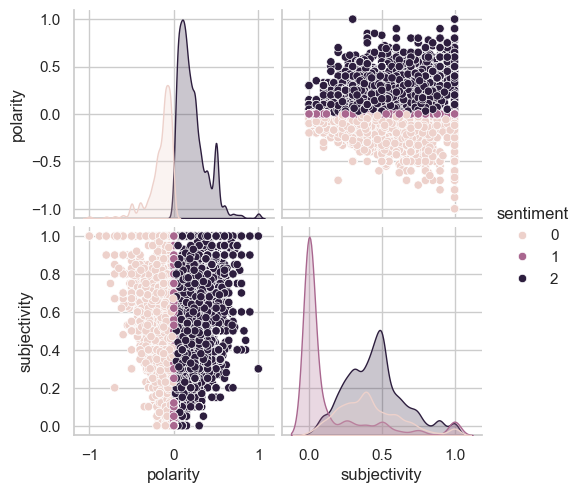

In [4]:
sns.pairplot(data=df5, hue="sentiment")

<Axes: xlabel='date', ylabel='polarity'>

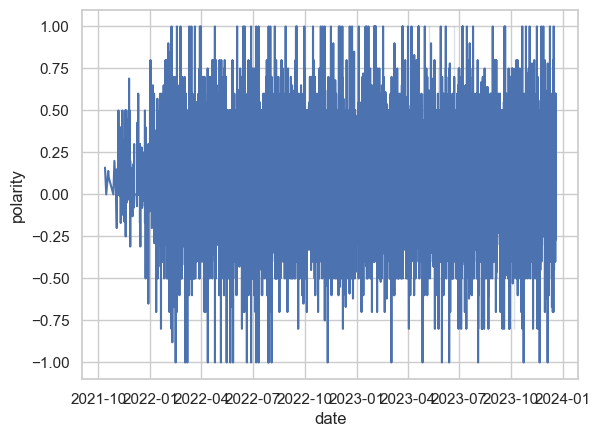

In [5]:
df5["date"] = pd.to_datetime(df5["date"], errors="coerce")
sns.lineplot(x="date", y="polarity", data=df5)

In [6]:
df5["date"]

0       2023-12-19 06:40:41
1       2023-12-19 06:03:24
2       2023-12-19 05:55:14
3       2023-12-19 05:35:26
4       2023-12-19 05:31:08
                ...        
31032   2021-10-27 15:17:00
31033   2021-10-19 13:39:00
31034   2021-10-18 13:58:00
31035   2021-10-15 00:00:00
31036   2021-10-12 20:00:00
Name: date, Length: 31037, dtype: datetime64[ns]

In [7]:
months = ["01","02","03","04","05","06","07","08","09","10","11","12"]
df6 = df5.copy()
df6["subject"] = df6["subject"].str.contains("bitcoin")
for i in months:
    i = f"2022-{i}"
    print(df6[df6["date"]>i].polarity.mean())

0.06384713126771577
0.06368884442221111
0.06344326031867255
0.06317167163527958
0.06280580195682797
0.062502002563281
0.06268533006301011
0.06301637447717363
0.06315415204678362
0.0632824844720497
0.06323317816335168
0.06358336174565293


In [12]:
import matplotlib.pyplot as plt
import matplotlib
import ydata_profiling as pp
%matplotlib inline
pp.ProfileReport(df5)


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

ImportError: matplotlib is required for plotting when the default backend "matplotlib" is selected.